In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [12]:
df['title'].nunique()

110

In [6]:
#Creating new features
#In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.
#For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [27]:
 df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])

In [28]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [29]:
df['Reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [32]:
sns.countplot(x=df['Reason],data=df)

SyntaxError: EOL while scanning string literal (<ipython-input-32-8ebee99c9d97>, line 1)

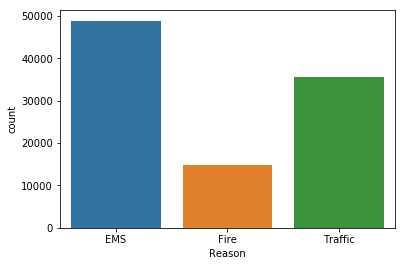

In [35]:
sns.countplot(x='Reason',data=df)

In [40]:
df['timeStamp'].dtypes()

TypeError: 'numpy.dtype' object is not callable

In [43]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [45]:
pd.to_datetime(df['timeStamp'])

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
5       2015-12-10 17:40:01
6       2015-12-10 17:40:01
7       2015-12-10 17:40:01
8       2015-12-10 17:40:01
9       2015-12-10 17:40:01
10      2015-12-10 17:40:01
11      2015-12-10 17:40:02
12      2015-12-10 17:40:02
13      2015-12-10 17:40:02
14      2015-12-10 17:40:02
15      2015-12-10 17:40:02
16      2015-12-10 17:46:01
17      2015-12-10 17:47:01
18      2015-12-10 17:47:01
19      2015-12-10 17:47:02
20      2015-12-10 17:47:02
21      2015-12-10 17:57:02
22      2015-12-10 18:02:01
23      2015-12-10 18:02:02
24      2015-12-10 18:02:02
25      2015-12-10 18:06:25
26      2015-12-10 18:06:25
27      2015-12-10 18:06:25
28      2015-12-10 18:06:26
29      2015-12-10 18:11:01
                ...        
99462   2016-08-24 09:41:00
99463   2016-08-24 09:42:00
99464   2016-08-24 09:51:06
99465   2016-08-24 09:56:13
99466   2016-08-24 1

In [47]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [49]:
time = df['timeStamp'].apply(lambda time:time.hour)
time.hour

17

In [53]:
time = df['timeStamp'].iloc[:]


In [56]:
type(time)

pandas.core.series.Series

In [58]:
time.dtype

dtype('<M8[ns]')

In [63]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [64]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,3


In [65]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [66]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [70]:
df['Day of Week'] = df['Day of Week'].map(dmap)

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
5        Thu
6        Thu
7        Thu
8        Thu
9        Thu
10       Thu
11       Thu
12       Thu
13       Thu
14       Thu
15       Thu
16       Thu
17       Thu
18       Thu
19       Thu
20       Thu
21       Thu
22       Thu
23       Thu
24       Thu
25       Thu
26       Thu
27       Thu
28       Thu
29       Thu
        ... 
99462    Wed
99463    Wed
99464    Wed
99465    Wed
99466    Wed
99467    Wed
99468    Wed
99469    Wed
99470    Wed
99471    Wed
99472    Wed
99473    Wed
99474    Wed
99475    Wed
99476    Wed
99477    Wed
99478    Wed
99479    Wed
99480    Wed
99481    Wed
99482    Wed
99483    Wed
99484    Wed
99485    Wed
99486    Wed
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

In [71]:
 df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])

In [72]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,3


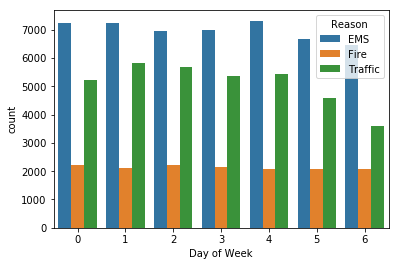

In [73]:
sns.countplot(x='Day of Week',data=df,hue='Reason')

In [77]:
byMonth = df.groupby('Month')

In [78]:
byMonth

In [81]:
byMonth = df.groupby('Month').count().head()

TypeError: cannot perform reduce with flexible type

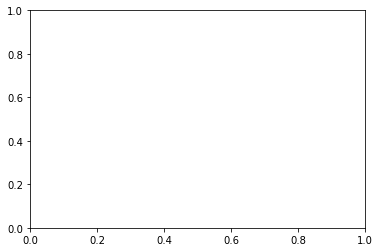

In [85]:
sns.distplot('byMonth')

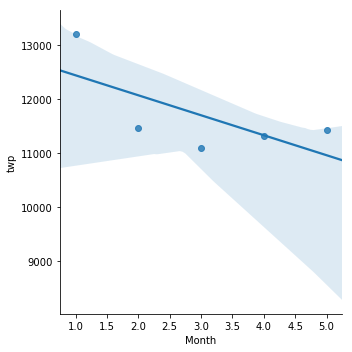

In [89]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [91]:
#Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the
#.date() method.

In [92]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,3


In [103]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)


datetime.date(2015, 12, 10)

In [104]:
df['Date'] = df['timeStamp'].apply(lambda timeStamp:timeStamp.date())

In [105]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

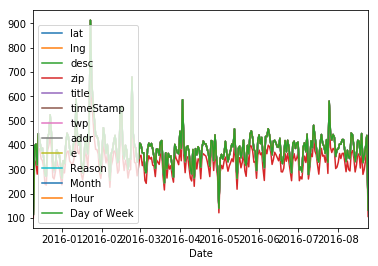

In [110]:
byDate = df.groupby('Date').count().plot()

In [108]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [109]:
sns.countplot(x='Date',data=byDate)

ValueError: Could not interpret input 'Date'

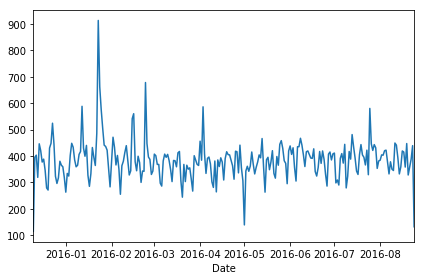

In [118]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [119]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,3,2015-12-10


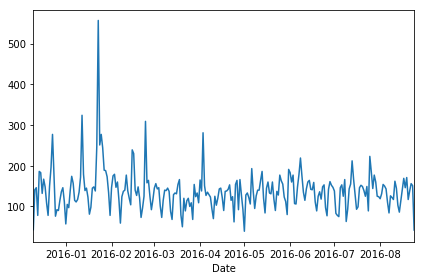

In [125]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [127]:
index = pd.MultiIndex.from_tuples([('one','Hour'),
                                  ('two','Day of Week')])

MultiIndex(levels=[['one', 'two'], ['Day of Week', 'Hour']],
           labels=[[0, 1], [1, 0]])

In [130]:
index = pd.MultiIndex.from_tuples([('Hour',df['Hour']),
                                  ('Day of Week',df['Day of Week'])])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [139]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


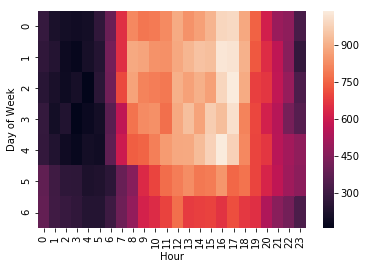

In [140]:

sns.heatmap(dayHour)

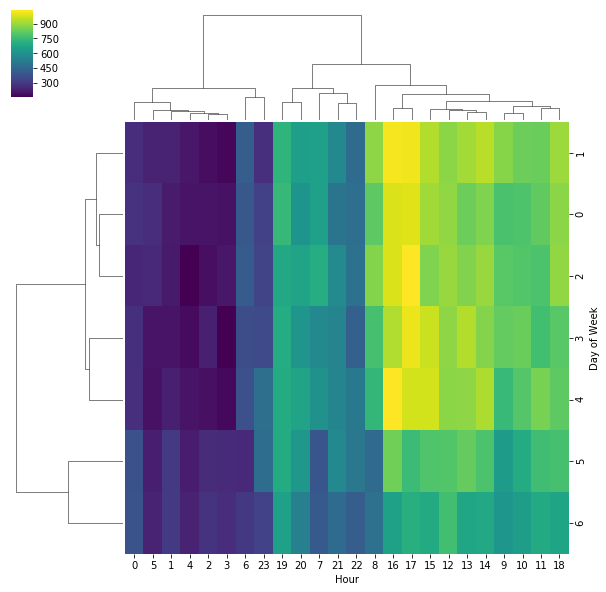

In [142]:

sns.clustermap(dayHour,cmap='viridis')

In [143]:
dayHour = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayHour.head

<bound method NDFrame.head of Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
0            1727  1964  1535  1598  1779  1617  1692  1511  1257
1            1973  1753  1884  1430  1918  1676  1670  1612  1234
2            1700  1903  1889  1517  1538  2058  1717  1295  1262
3            1584  1596  1900  1601  1590  2065  1646  1230  1266
4            1970  1581  1525  1958  1730  1649  2045  1310  1065
5            2291  1441  1266  1734  1444  1388  1695  1099   978
6            1960  1229  1102  1488  1424  1333  1672  1021   907>

In [145]:
df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
